In [1]:
import numpy as np
import matplotlib.pyplot as plt

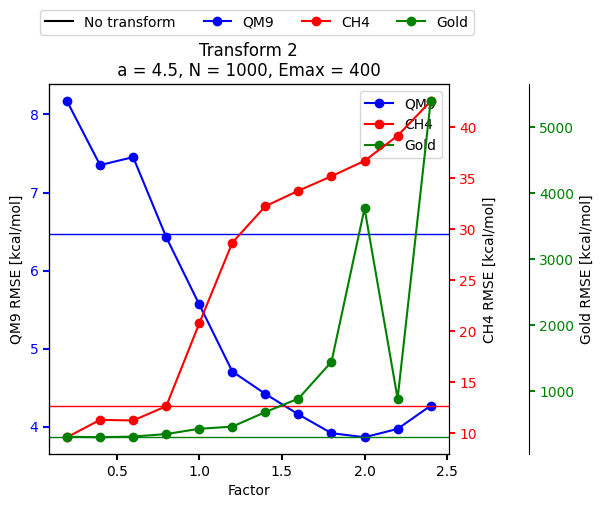

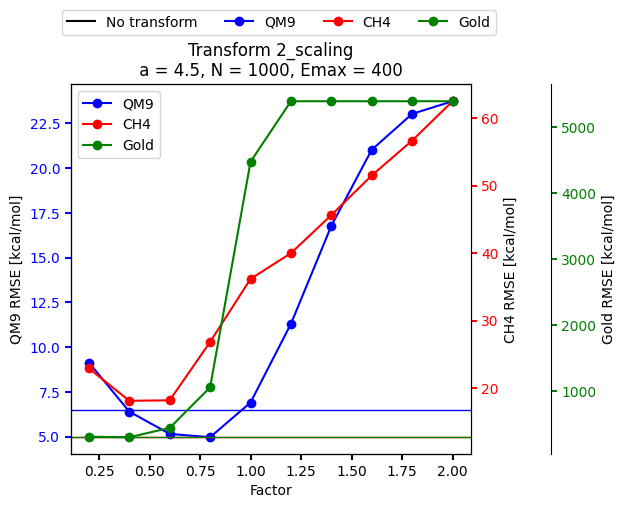

RMSE without scaling, with scaling and without transform (Plot below)
QM9:  [3.8629770278930664, 4.961857318878174, 6.46769380569458]
CH$_4$:  [9.60783863067627, 18.096683502197266, 12.694133758544922]
Gold:  [303.9044494628906, 302.35296630859375, 312.8511657714844]


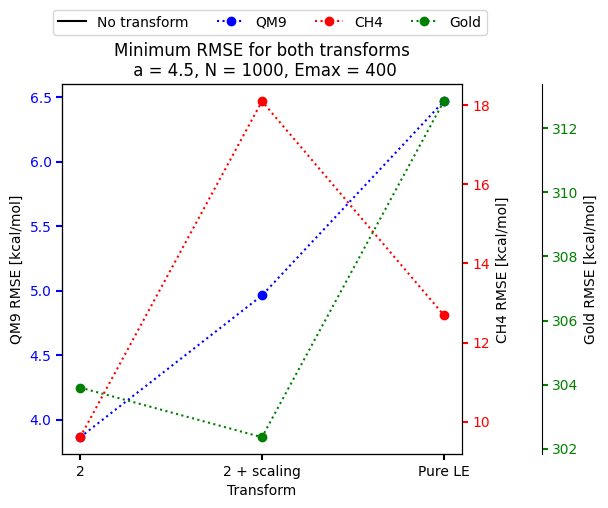

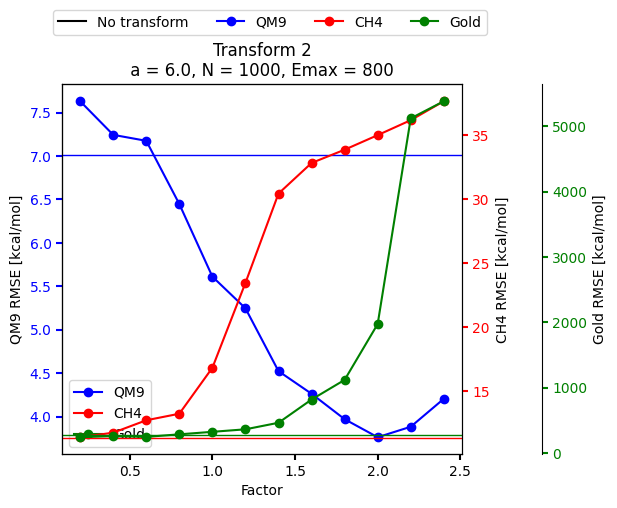

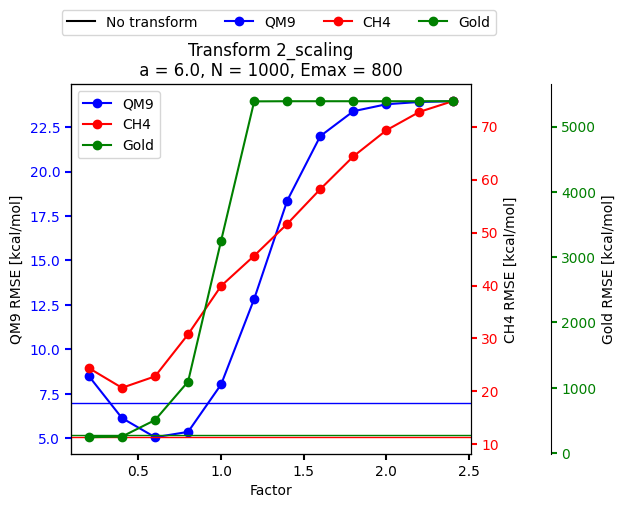

RMSE without scaling, with scaling and without transform (Plot below)
QM9:  [3.7615294456481934, 5.06482458114624, 7.015270709991455]
CH$_4$:  [11.432597160339355, 20.68165397644043, 11.348184585571289]
Gold:  [243.14251708984375, 242.7717742919922, 279.55841064453125]


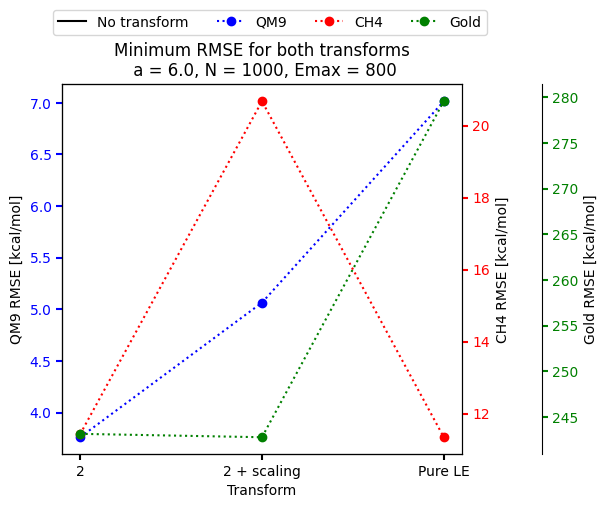

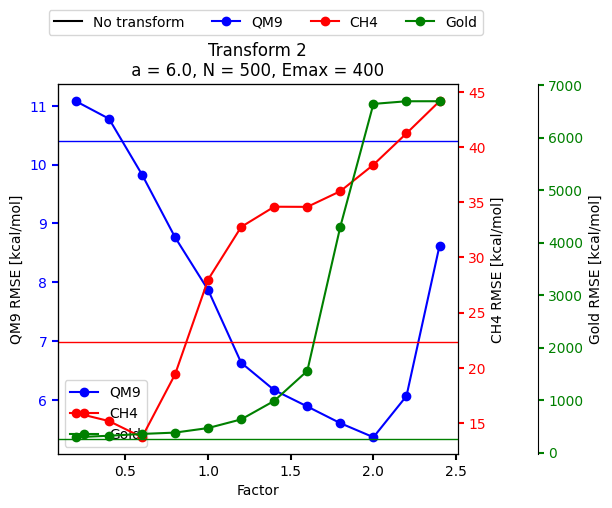

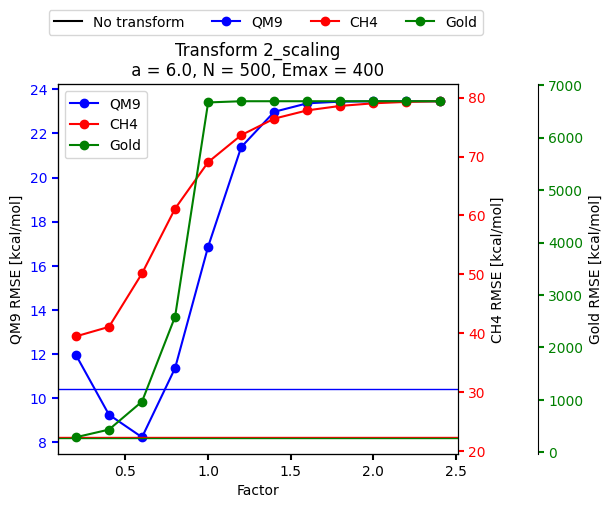

RMSE without scaling, with scaling and without transform (Plot below)
QM9:  [5.362800121307373, 8.228286743164062, 10.404585838317871]
CH$_4$:  [13.713188171386719, 39.46311950683594, 22.336441040039062]
Gold:  [291.6579895019531, 287.27886962890625, 266.33489990234375]


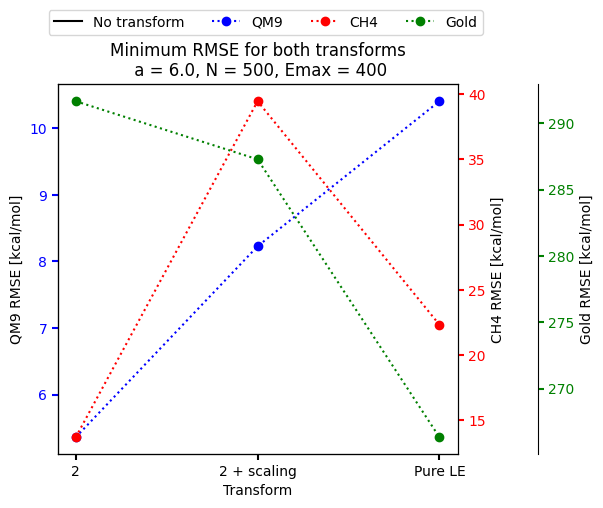

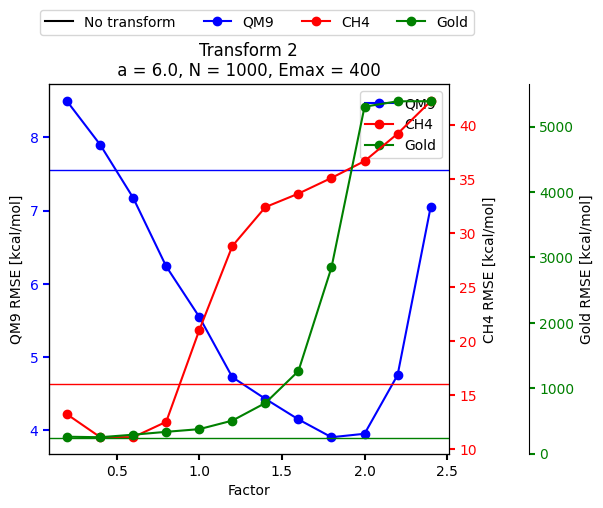

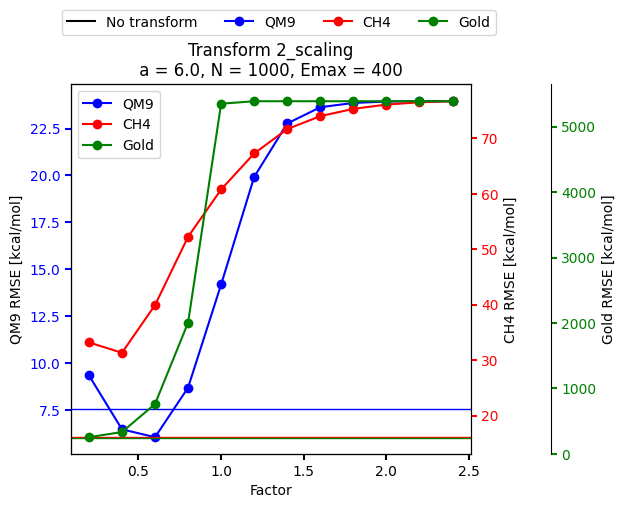

RMSE without scaling, with scaling and without transform (Plot below)
QM9:  [3.905165910720825, 6.039557933807373, 7.560379981994629]
CH$_4$:  [11.121139526367188, 31.32637596130371, 16.092771530151367]
Gold:  [250.9324493408203, 254.45367431640625, 240.3690948486328]


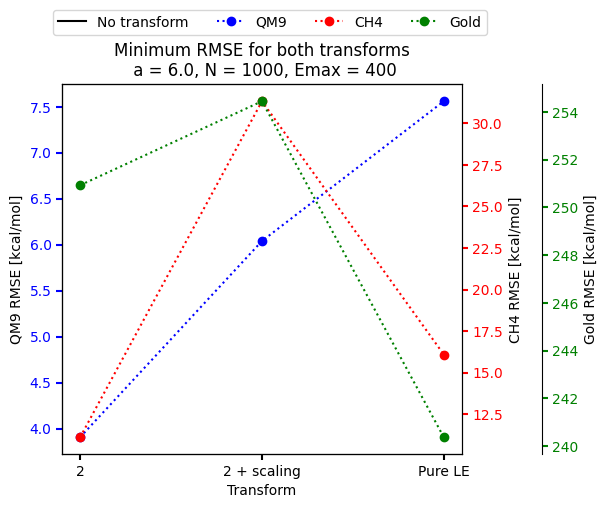

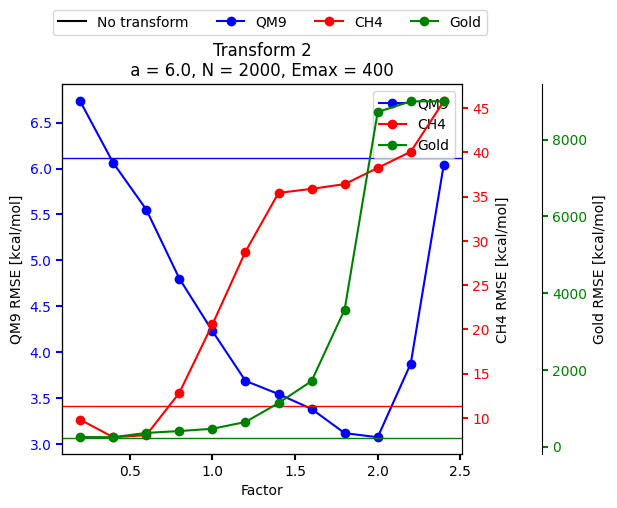

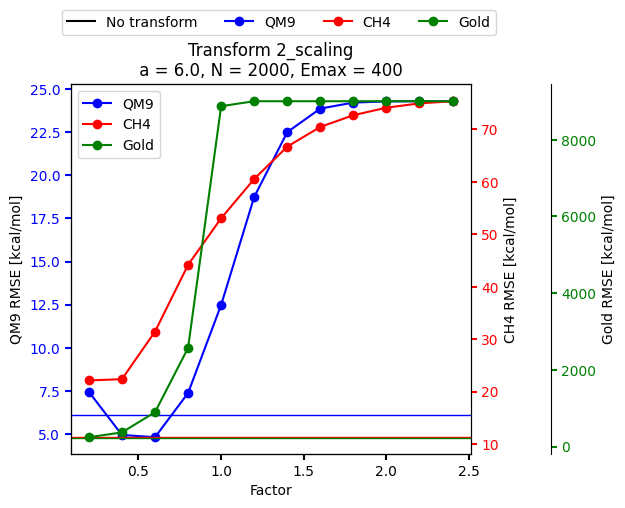

RMSE without scaling, with scaling and without transform (Plot below)
QM9:  [3.0775184631347656, 4.815521717071533, 6.109782695770264]
CH$_4$:  [7.815242767333984, 22.150854110717773, 11.325263977050781]
Gold:  [243.2280731201172, 245.82810974121094, 221.55422973632812]


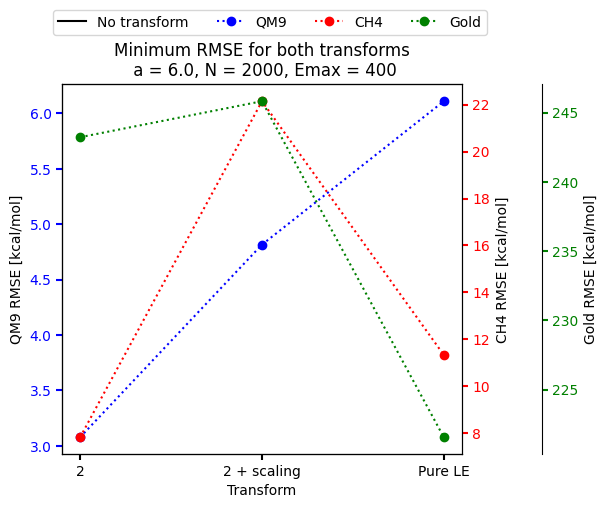

In [2]:
### This notebook shows Transform #2 with and without radial scaling vs. pure LE using different hyperparameters (scaling: x = (1-np.exp(-factor*r))*np.exp(-factor*r)   )
 

no_of_tr = 8
transforms = [2, '2_scaling']
parameters = [[4.5,1000,400],[6.0,1000,800],[6.0,500,400],[6.0,1000,400],[6.0,2000,400]] # first: a, second: N, third: Emax

#reference: no scaling or transform:
Reference_Path = '/home/ach/radial-physics_new/radial-physics/output/GPR_old_cweight/TR2_rscal/TR_0' 
#QM9
label_qm9_ref = []
rmse_qm9_ref = []
data_qm9_ref = open(Reference_Path+f'/Data_TR0_qm9','r')
#Gold
label_gold_ref = []
rmse_gold_ref = []
data_gold_ref = open(Reference_Path+f'/Data_TR0_gold','r')
#Methane
label_ch4_ref = []
rmse_ch4_ref = []
data_ch4_ref = open(Reference_Path+f'/Data_TR0_random-ch4-10k','r')
for row in data_qm9_ref: #QM9
    row = row.split(' ')
    label_qm9_ref.append((row[0]))
    rmse_qm9_ref.append(float(row[1]))

for row in data_gold_ref: #Gold
    row = row.split(' ')
    label_gold_ref.append((row[0]))
    rmse_gold_ref.append(float(row[1]))

for row in data_ch4_ref: #Methane
    row = row.split(' ')
    label_ch4_ref.append((row[0]))
    rmse_ch4_ref.append(float(row[1]))

ch4_dict_ref = dict(zip(label_ch4_ref, rmse_ch4_ref)) #print(ch4_dict_ref['4.5_400_1000'])
gold_dict_ref = dict(zip(label_gold_ref, rmse_gold_ref))
qm9_dict_ref = dict(zip(label_qm9_ref, rmse_qm9_ref))


for param in parameters:

    minimia_all_tr_qm9 = []
    minimia_all_tr_ch4 = []
    minimia_all_tr_gold = []

    for i in transforms: # range(1,no_of_tr+1)
    
        Path = f'/home/ach/radial-physics_new/radial-physics/output/GPR_old_cweight/TR2_rscal/TR_{i}'
        #Define/reset lists + open data
        factor_qm9 = [] #QM9
        rmse_qm9 = []
        data_qm9 = open(Path+f'/a_{param[0]}_N_{param[1]}_E_{param[2]}/Data_TR2_qm9','r')

        factor_gold = [] #Gold
        rmse_gold = []
        data_gold = open(Path+f'/a_{param[0]}_N_{param[1]}_E_{param[2]}/Data_TR2_gold','r')

        factor_ch4 = [] #Methane
        rmse_ch4 = []
        data_ch4 = open(Path+f'/a_{param[0]}_N_{param[1]}_E_{param[2]}/Data_TR2_random-ch4-10k','r')

        for row in data_qm9: #QM9
            row = row.split(' ')
            factor_qm9.append(float(row[0]))
            rmse_qm9.append(float(row[1]))
        
        for row in data_gold: #Gold
            row = row.split(' ')
            factor_gold.append(float(row[0]))
            rmse_gold.append(float(row[1]))
        
        for row in data_ch4: #Methane
            row = row.split(' ')
            factor_ch4.append(float(row[0]))
            rmse_ch4.append(float(row[1]))
        
        #indices of minima and minima (for plot later)
        minimum_indx_qm9 = np.argmin(rmse_qm9,axis=0)
        minimum_indx_ch4 = np.argmin(rmse_ch4,axis=0)
        minimum_indx_gold = np.argmin(rmse_gold,axis=0)
        
        minimia_all_tr_qm9.append(rmse_qm9[minimum_indx_qm9])
        minimia_all_tr_ch4.append(rmse_ch4[minimum_indx_ch4])
        minimia_all_tr_gold.append(rmse_gold[minimum_indx_gold])


        fig, ax = plt.subplots()
        fig.subplots_adjust(right=0.75)

        twin1 = ax.twinx()
        twin2 = ax.twinx()

        # Offset the right spine of twin2.  The ticks and label have already been
        # placed on the right by twinx above.
        twin2.spines.right.set_position(("axes", 1.2))

        p1, = ax.plot(factor_qm9, rmse_qm9 , "b-o", label="QM9")
        p2, = twin1.plot(factor_ch4, rmse_ch4, "r-o", label="CH4")
        p3, = twin2.plot(factor_gold, rmse_gold, "g-o", label="Gold")

        # ax.set_xlim(0, 2)
        # ax.set_ylim(0, 2)
        # twin1.set_ylim(0, 4)
        # twin2.set_ylim(1, 65)

        ax.set_xlabel("Factor")
        ax.set_ylabel("QM9 RMSE [kcal/mol]")
        transforms[1] = '2 + radial scaling'
        ax.set_title(f"Transform {i}\n a = {param[0]}, N = {param[1]}, Emax = {param[2]} ")
        transforms[1] = '2_scaling'
        twin1.set_ylabel("CH4 RMSE [kcal/mol]")
        twin2.set_ylabel("Gold RMSE [kcal/mol]")

        # ax.yaxis.label.set_color(p1.get_color())
        # twin1.yaxis.label.set_color(p2.get_color())
        # twin2.yaxis.label.set_color(p3.get_color())

        tkw = dict(size=4, width=1.5)
        ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
        twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
        twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
        ax.tick_params(axis='x', **tkw)


        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5)
        ax.axhline(qm9_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'], color='blue', linestyle='solid',linewidth=1)
        twin1.axhline(ch4_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'], color='red', linestyle='solid',linewidth=1)
        twin2.axhline(gold_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'], color='green', linestyle='solid',linewidth=1)
        ax.legend(handles=[p1, p2, p3], loc = 'best')

        from matplotlib.lines import Line2D
        line1 = Line2D([0], [0], label='No transform', color='black')
        fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.8, 1.05), ncol=5,)
        plt.show()




    ### one plot for each data set with all minima:


    fig, ax = plt.subplots()
    fig.subplots_adjust(right=0.75)

    twin1 = ax.twinx()
    twin2 = ax.twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines.right.set_position(("axes", 1.2))

    
    minimia_all_tr_qm9.append(qm9_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'])
    minimia_all_tr_ch4.append(ch4_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'])
    minimia_all_tr_gold.append(gold_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'])
    print("RMSE without scaling, with scaling and without transform (Plot below)")
    print("QM9: ",minimia_all_tr_qm9)
    print("CH$_4$: ", minimia_all_tr_ch4)
    print("Gold: ", minimia_all_tr_gold)

    transforms = np.append(transforms, ['Pure LE'])
    transforms[1] = '2 + scaling'
    p1, = ax.plot(transforms, minimia_all_tr_qm9 , "bo", label="QM9", ls = ':')  #range(1,no_of_tr+1)
    p2, = twin1.plot(transforms, minimia_all_tr_ch4, "r:o", label="CH4")
    p3, = twin2.plot(transforms, minimia_all_tr_gold, "g:o", label="Gold")
    transforms = np.delete(transforms,-1)
    transforms[1] = '2_scaling'
    # ax.set_xlim(0, 2)
    # ax.set_ylim(0, 2)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax.set_xlabel("Transform")
    ax.set_ylabel("QM9 RMSE [kcal/mol]")
    ax.set_title(f"Minimum RMSE for both transforms\n a = {param[0]}, N = {param[1]}, Emax = {param[2]}")
    twin1.set_ylabel("CH4 RMSE [kcal/mol]")
    twin2.set_ylabel("Gold RMSE [kcal/mol]")

    # ax.yaxis.label.set_color(p1.get_color())
    # twin1.yaxis.label.set_color(p2.get_color())
    # twin2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=4, width=1.5)
    ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
    twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    ax.tick_params(axis='x', **tkw)

    # Add RMSE without transform
    # ax.axhline(qm9_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'], color='blue', linestyle='solid',linewidth=1)
    # twin1.axhline(ch4_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'], color='red', linestyle='solid',linewidth=1)
    # twin2.axhline(gold_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'], color='green', linestyle='solid',linewidth=1)
    # ax.legend(handles=[p1, p2, p3], loc = 'best')

    from matplotlib.lines import Line2D
    line1 = Line2D([0], [0], label='No transform', color='black')
    fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.8, 1.05), ncol=5,)

################## RMSE for a, N, emax = [6.0,2000,400] ################## (accidentally deleted directory)
# RMSE without scaling, with scaling and without transform
# QM9: [2.6675946712493896, 3.831709384918213, 4.7445220947265625]
# CH$_4$: [4.93049430847168, 17.565208435058594, 6.964672088623047]
# Gold: [173.2955780029297, 178.07241821289062, 166.98548889160156]